## Variant statistics in R

#### Preparation
Load the required packages

In [1]:
library(tidyverse)
#library(dplyr)
library(reshape2)
#library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




## genotyping statistics

### import and preparation

In [2]:
#Import genotypes
geno<-read.delim2("./results_variantAnn/GMTS.geno.txt")
colnames(geno)<-c("chr","raw_pos","id","raw_ref","raw_alt","qual","filter","AC","AF","AN","BaseQRankSum","ClippingRankSum","DP","DS","END","ExcessHet","FS","Hrun","HaplotypeScore","InbreedingCoeff","MLEAC","MLEAF","MQ","MQRankSum","QD","RAW_MQ","ReadPosRankSum","SOR","SAMPLE","AD","DP.1","GQ","GT","MIN_DP","PGT","PID","PL","RGQ","SB")

In [3]:
#create a unique variant ID
geno<-geno %>% 
  mutate(varID=paste(chr,raw_pos,raw_ref,raw_alt,sep=":"))

In [4]:
#add indel info
geno<-geno %>% 
  mutate(type=ifelse(nchar(as.character(raw_ref))>1 | nchar(as.character(raw_alt))>1,"indel","SNV"))

In [5]:
#edit SAMPLE
geno$SAMPLE<-as.character(geno$SAMPLE)

### general statistics

In [6]:
#number of variants
geno %>% 
  select(varID) %>% 
  unique() %>% 
  nrow()

[1] 8050

In [7]:
#number of samples
geno %>% 
  select(SAMPLE) %>% 
  unique() %>% 
  nrow()

[1] 38

In [8]:
#number of genotypes 
table(geno$GT)

# or
geno %>% 
  group_by(GT) %>% 
  tally()


   ./.    ./0    ./1    0/0    0/1    1/1 
  1107   3443    252 255467  30737  15084 

,GT,n
,<fct>,<int>
1,./.,1107
2,./0,3443
3,./1,252
4,0/0,255467
5,0/1,30737
6,1/1,15084


In [9]:
#remove ambiguous and hom ref genotypes
geno<-geno %>% 
  filter(GT=="0/1" | GT=="1/1")

In [10]:
#getting allelic fraction
geno<-geno %>% 
  separate(AD,into=c("Rcnt","Acnt"),remove = F, convert=T, sep=",") %>%
  mutate(AF=Acnt/(Rcnt+Acnt))

Warning message:
“Expected 2 pieces. Additional pieces discarded in 2539 rows [304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, ...].”


ERROR: Error: Problem with `mutate()` input `AF`.
[31m✖[39m non-numeric argument to binary operator
[34mℹ[39m Input `AF` is `Acnt/(Rcnt + Acnt)`.


In [13]:
#number of variant of each GT and type per sample
#geno %>% select(SAMPLE,GT,type,varID) %>% 
#  unique() %>% 
#  group_by(SAMPLE,GT,type) %>% 
 # tally() 


geno %>% select(SAMPLE,GT,type,varID) %>% 
  unique() %>% 
  group_by(SAMPLE,GT,type) %>% 
  tally() %>% spread(type,value=n)


# or

#geno %>% select(SAMPLE,GT,type,varID) %>% 
#  unique() %>% 
#  group_by(SAMPLE,GT,type) %>% 
 # summarize(Nvariants=length(varID))

SAMPLE,GT,indel,SNV
<chr>,<fct>,<int>,<int>
201849403,0/1,138,659
201849403,1/1,70,309
201852861,0/1,158,657
201852861,1/1,54,346
201855169,0/1,125,627
201855169,1/1,64,339
201855171,0/1,138,645
201855171,1/1,66,350
201855194,0/1,154,668


In [14]:
#median number of each variant type per samples

geno %>% select(SAMPLE,type,varID) %>% 
  unique() %>% 
  group_by(SAMPLE,type) %>% 
  summarize(Nvariants=length(varID)) %>%
  group_by(type) %>%
  summarize(medVar=median(Nvariants),minVar=min(Nvariants),maxVar=max(Nvariants))

`summarise()` has grouped output by 'SAMPLE'. You can override using the `.groups` argument.



,type,medVar,minVar,maxVar
,<chr>,<dbl>,<int>,<int>
1,indel,217.0,189,235
2,SNV,993.5,950,1038


### annotation

In [15]:
anno<-read.delim2("./materials_varCall/myanno.21.txt",header=F)
colnames(anno)<-c("chr","pos","raw_pos","ref","raw_ref","alt","raw_alt","mut_type","function","region_type","region_name","refGene.name","refGene.name2","dbSNP.name","ExAC_r0_3_sites_vep.name","ExAC_r0_3_sites_vep.AF","dbNSFP.SIFT_pred","dbNSFP.Polyphen2_HDIV_pred","dbNSFP.MutationTaster_pred","dbNSFP.MetaSVM_pred","dbNSFP.clinvar_clnsig","clinvar.CLNSIG")

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“embedded nul(s) found in input”


In [16]:
#clean up annotations by removing leading and trailing white spaces
anno$chr<-paste0("chr",trimws(anno$chr))
anno$raw_pos<-as.numeric(trimws(anno$raw_pos))
anno$raw_ref<-trimws(anno$raw_ref)
anno$raw_alt<-trimws(anno$raw_alt)
anno$refGene.name2<-trimws(anno$refGene.name2)

In [17]:
#create a unique variant ID
anno<-anno %>% mutate(varID=paste(chr,raw_pos,raw_ref,raw_alt,sep=":"))

In [18]:
#how many variants
anno %>% select(varID) %>% unique() %>% nrow()

[1] 7968

In [20]:
anno %>% group_by(mut_type,region_type) %>% tally() %>% spread(region_type,value=n)

mut_type,downstream,exonic,exonic;splicing,intergenic,intronic,ncRNA_exonic,ncRNA_intronic,ncRNA_UTR3,splicing,upstream,UTR3,UTR5,UTR5;UTR3
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
.,7,NA,NA,2,4827,28,70,5,47,101,696,201,1
frameshift deletion,NA,46,2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
frameshift insertion,NA,221,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
frameshift substitution,NA,7,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
nonframeshift deletion,NA,22,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
nonframeshift insertion,NA,92,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
nonframeshift substitution,NA,3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
nonsynonymous SNV,NA,747,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
stopgain,NA,85,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [21]:
#flagging the delterious ones
anno<-anno %>% mutate(isLOF=ifelse(grepl("frameshift",anno$mut_type) | 
                  grepl("stop",anno$mut_type) | 
                  (mut_type=="nonsynonymous SNV" & dbNSFP.MetaSVM_pred=="D")| 
                    dbNSFP.clinvar_clnsig=="5" | 
                  region_type=="splicing", "LOF","notLOF"))

In [22]:
#count by LOF flag
anno %>% group_by(isLOF) %>% tally()

,isLOF,n
,<chr>,<int>
1,LOF,485
2,notLOF,7483


#### plotting

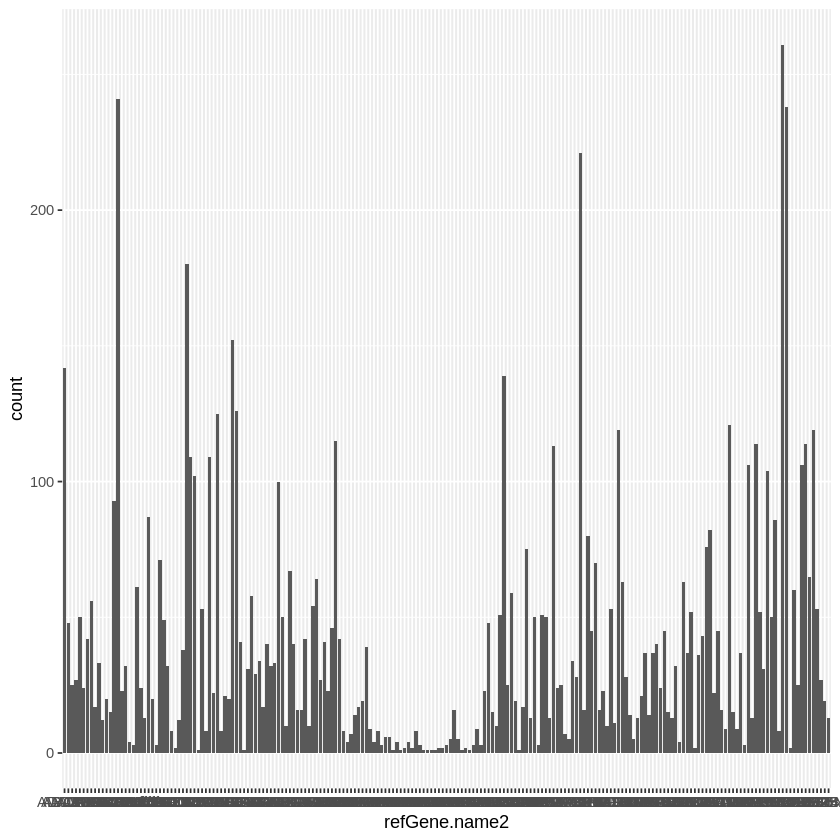

In [23]:
#variants per gene
ggplot(anno,aes(refGene.name2))+geom_bar()

Joining, by = "refGene.name2"



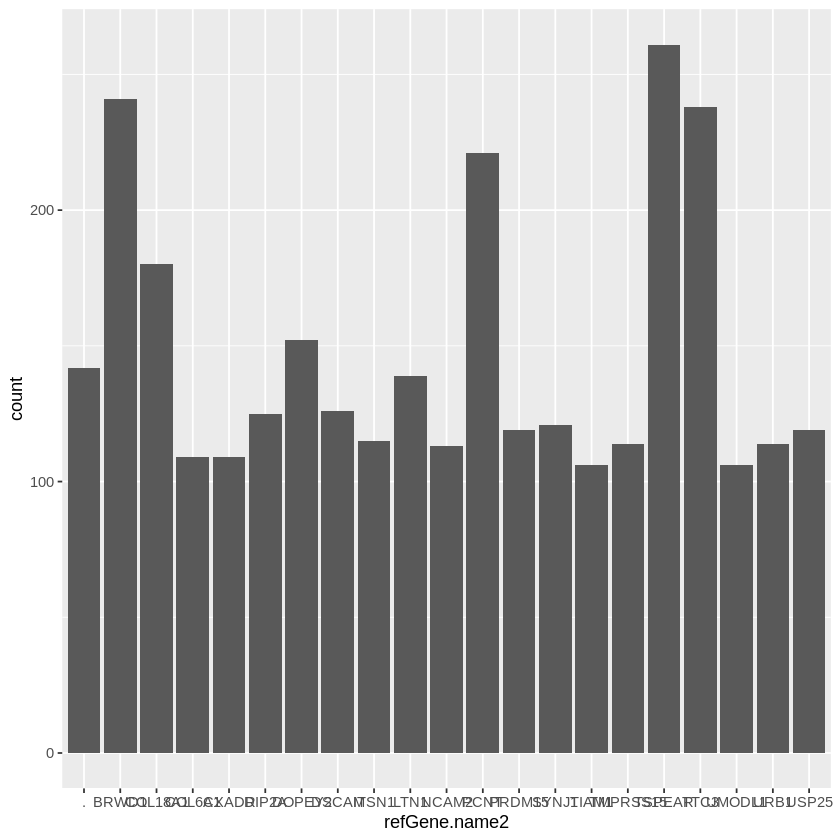

In [24]:
#identifying the top 20 genes
topGenes<-anno %>% group_by(refGene.name2) %>% tally() %>% top_n(20,n) %>% select(refGene.name2)
anno_top<-left_join(topGenes,anno)
ggplot(anno_top,aes(refGene.name2))+geom_bar()

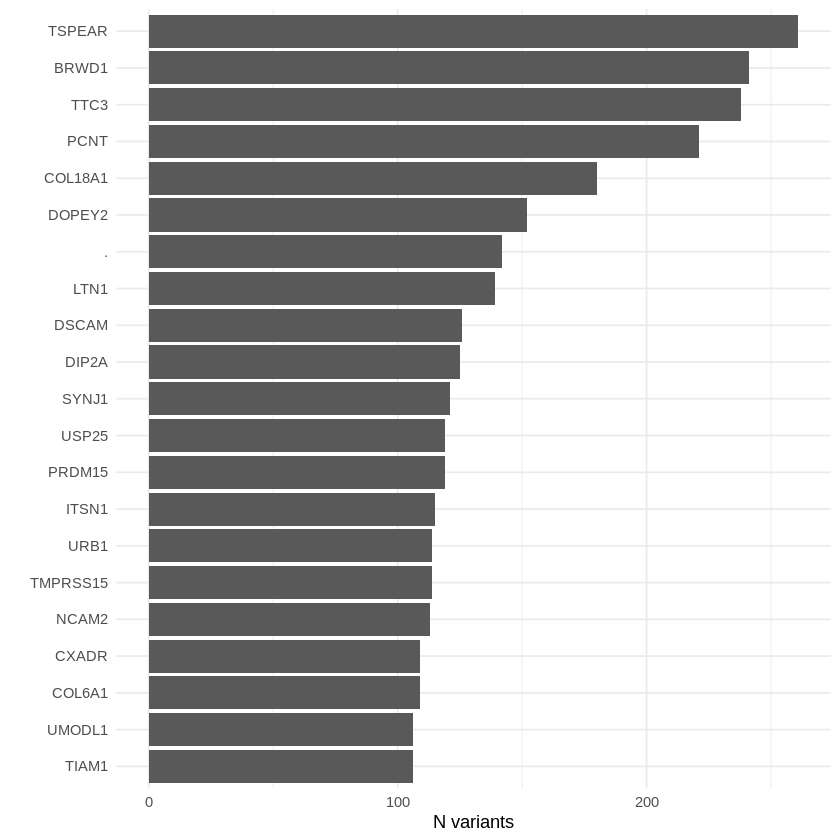

In [25]:
#making it pretty. starting with aggregated numbers
anno_top<-anno %>% group_by(refGene.name2) %>% tally() %>% top_n(20,n) 

ggplot(anno_top,aes(reorder(refGene.name2,n),n))+geom_bar(stat="identity")+
  coord_flip()+
  xlab("")+
  ylab("N variants")+
  theme_minimal()+
  theme(axis.text.y = element_text(hjust=1))

#### joining both datasets

In [27]:
#geno_lite<-geno %>% select(varID,SAMPLE,type,qual,GT,Rcnt,Acnt,AF)
geno_lite<-geno %>% select(varID,SAMPLE,type,qual,GT)
anno_lite<-anno %>% select(varID,refGene.name2,mut_type,region_type,`function`,isLOF)
data<-left_join(geno_lite,anno_lite)
data$qual<-as.numeric(as.character(data$qual))

Joining, by = "varID"



In [ ]:
#distribution of allelic fraction
#ggplot(data,aes(AF))+geom_histogram()

In [28]:
#LOF burden per patient
data %>% group_by(SAMPLE) %>% summarize(fracLOF=length(varID[isLOF=="LOF"])/length(varID))

,SAMPLE,fracLOF
,<chr>,<dbl>
1,201849403,0.04676871
2,201852861,0.04773663
3,201855169,0.04069264
4,201855171,0.04503753
5,201855194,0.04858300
6,201855219,0.04777595
7,201855223,0.04438861
8,201855243,0.04152824
9,201855257,0.05652535


In [29]:
dataS1<-data %>% filter(SAMPLE=="201849403")

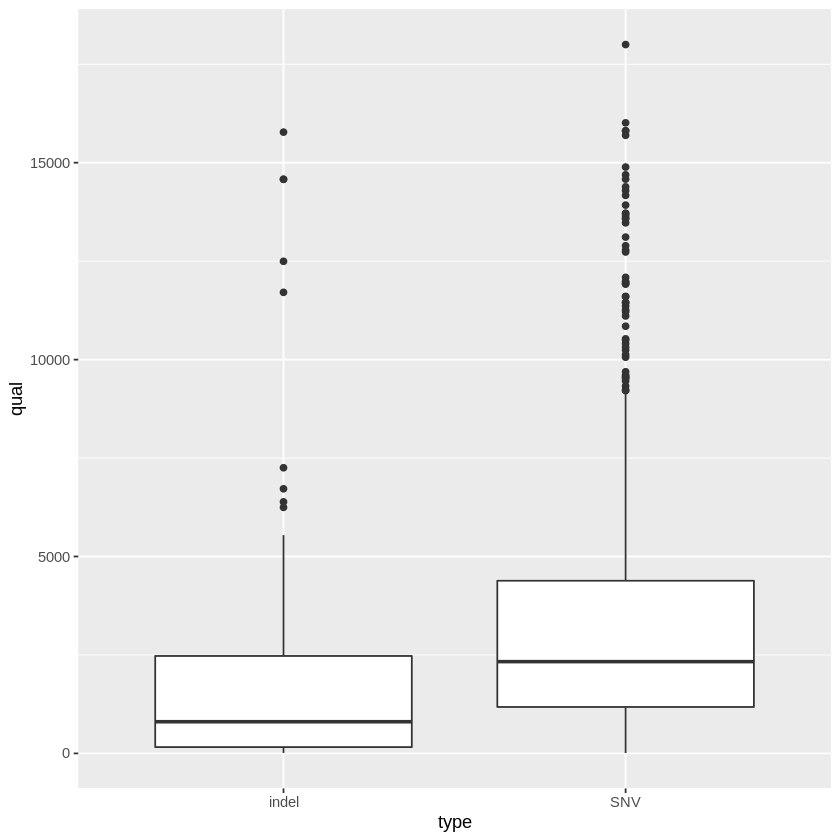

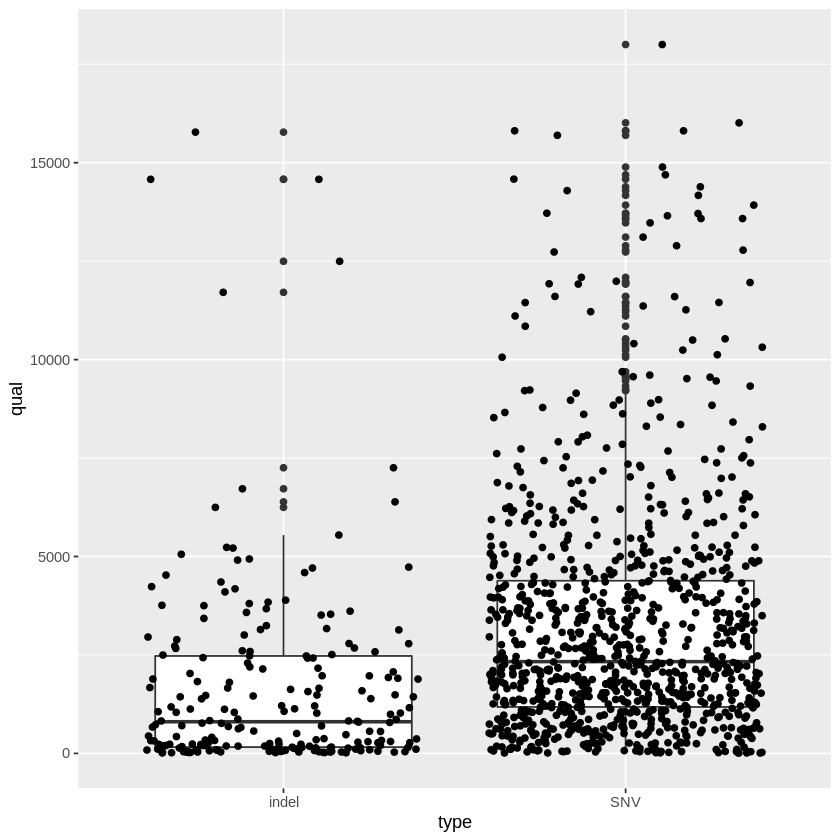

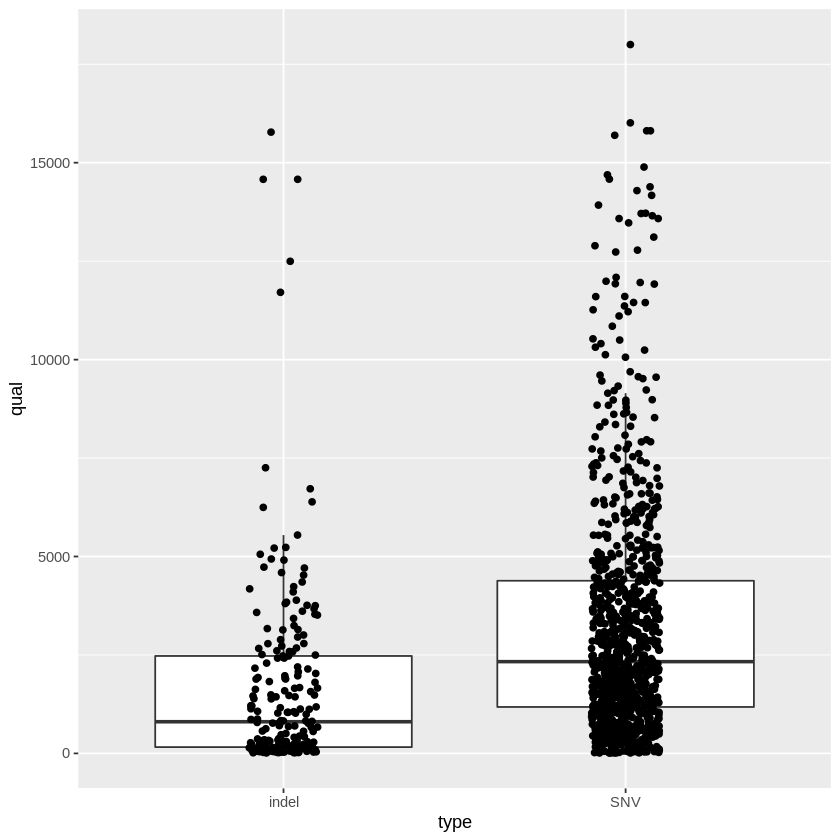

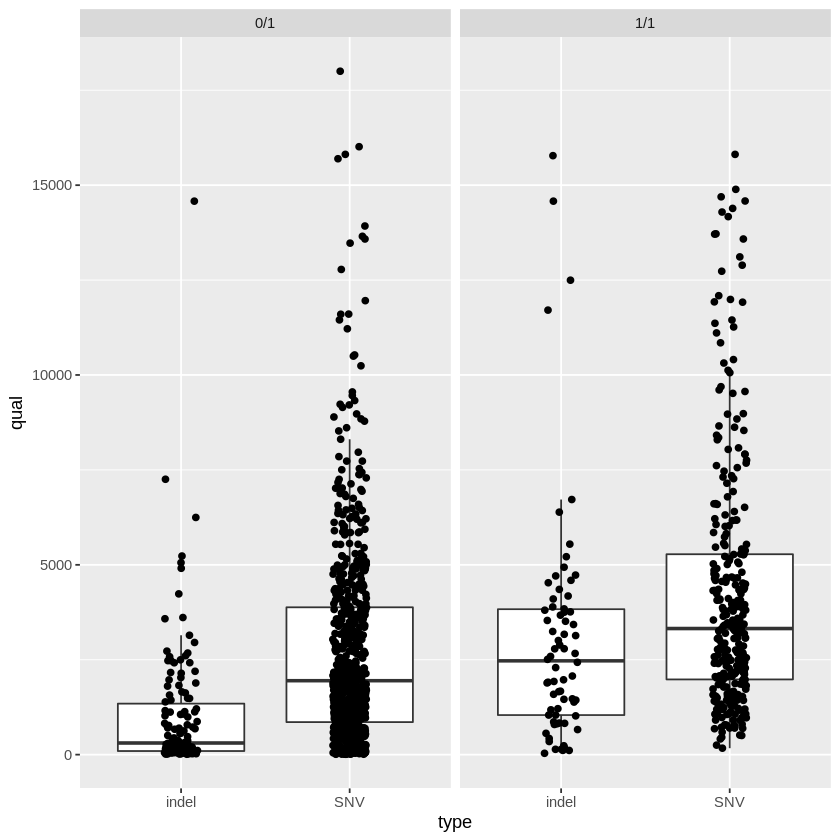

In [30]:
#comparing quality by type and GT
ggplot(dataS1,aes(type,qual))+geom_boxplot()
ggplot(dataS1,aes(type,qual))+geom_boxplot()+geom_jitter()
ggplot(dataS1,aes(type,qual))+geom_boxplot(outlier.shape = NA)+geom_jitter(width=0.1)
ggplot(dataS1,aes(type,qual))+geom_boxplot(outlier.shape = NA)+geom_jitter(width=0.1)+facet_wrap(~GT)

In [ ]:
#comapring AF and GT
#ggplot(dataS1,aes(Rcnt,Acnt))+geom_point()
#ggplot(dataS1,aes(Rcnt,Acnt,col=GT))+geom_point()

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'Rcnt' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

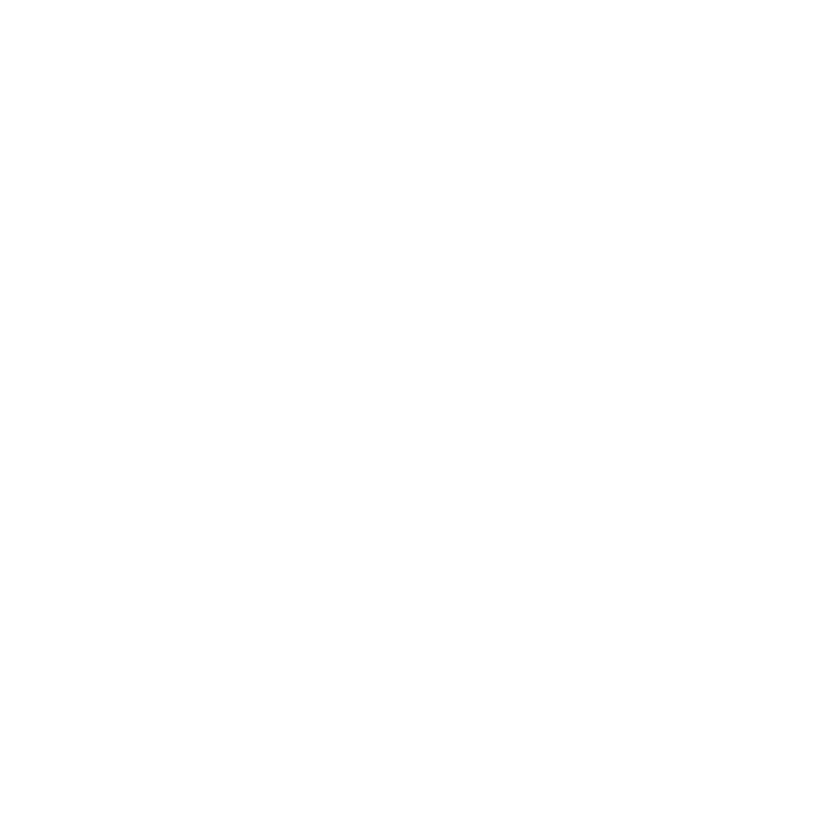

In [31]:
#coverage depth distribution
#ggplot(data,aes(type,log10(Rcnt+Acnt)))+geom_violin()
#ggplot(data,aes(log10(Rcnt+Acnt),col=type))+stat_ecdf()
#ggplot(data,aes(log10(Rcnt+Acnt),col=type))+stat_ecdf()+ylab("Fraction of variants")

In [ ]:
#ggplot(data,aes(Rcnt+Acnt,col=type))+stat_ecdf()

In [32]:
#bar-graph of variant type
dataLOF<-data %>% filter(isLOF=="LOF") %>% mutate(mut_type=ifelse(region_type=="splicing","splicing",as.character(mut_type)))

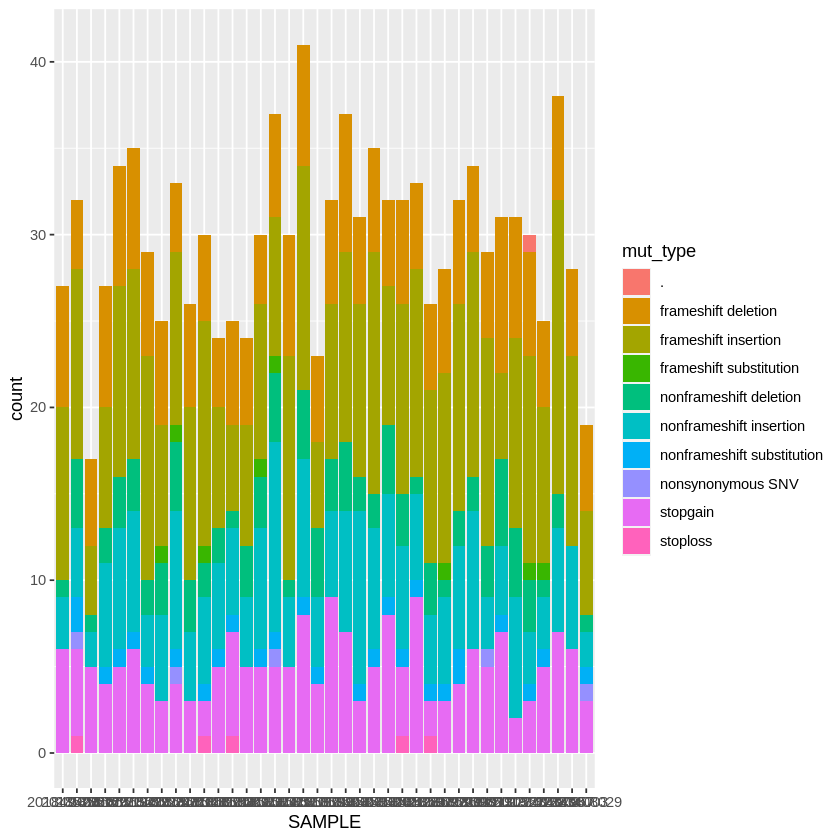

In [33]:
ggplot(dataLOF,aes(SAMPLE,fill=mut_type))+geom_bar()

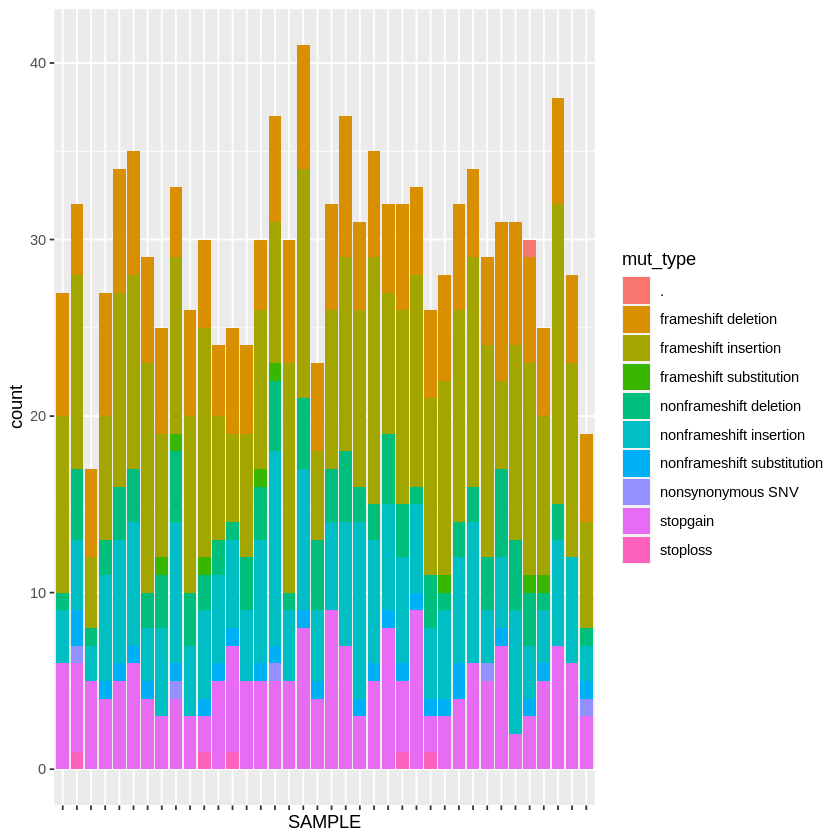

In [34]:
ggplot(dataLOF,aes(SAMPLE,fill=mut_type))+geom_bar()+theme(axis.text.x = element_blank())

In [35]:
tmp<-dataLOF %>% group_by(SAMPLE) %>% tally() %>% arrange(-n)

In [36]:
dataLOF$SAMPLE<-factor(dataLOF$SAMPLE,levels=tmp$SAMPLE)

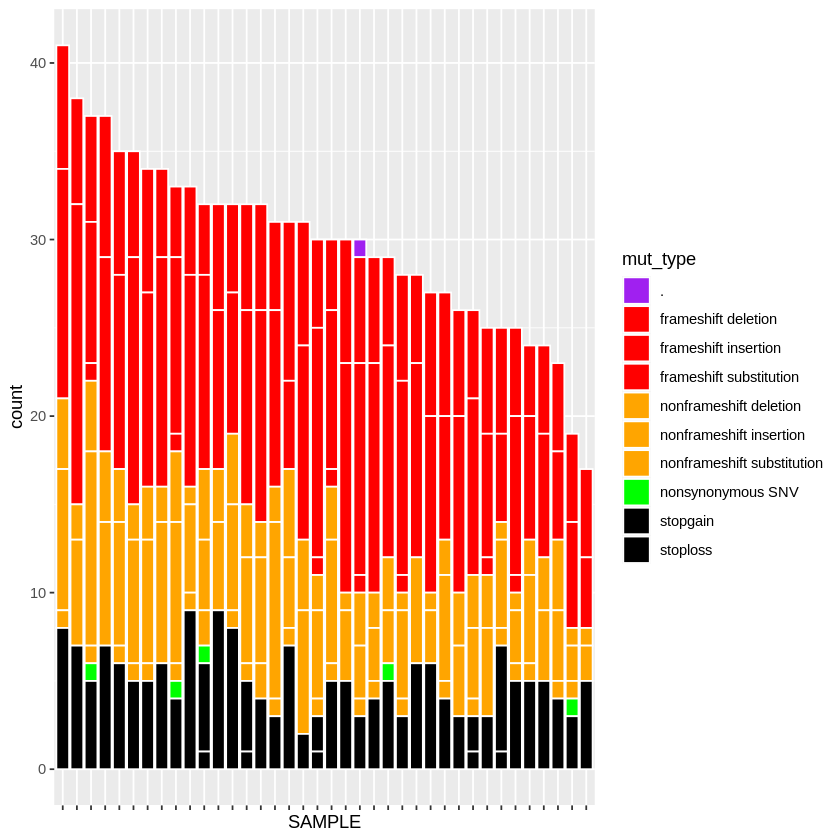

In [37]:
ggplot(dataLOF,aes(SAMPLE,fill=mut_type))+
  geom_bar(color="white")+
  theme(axis.text.x = element_blank())+
  scale_fill_manual(values=c("purple",rep("red",3),rep("orange",3),"green","black","black"))

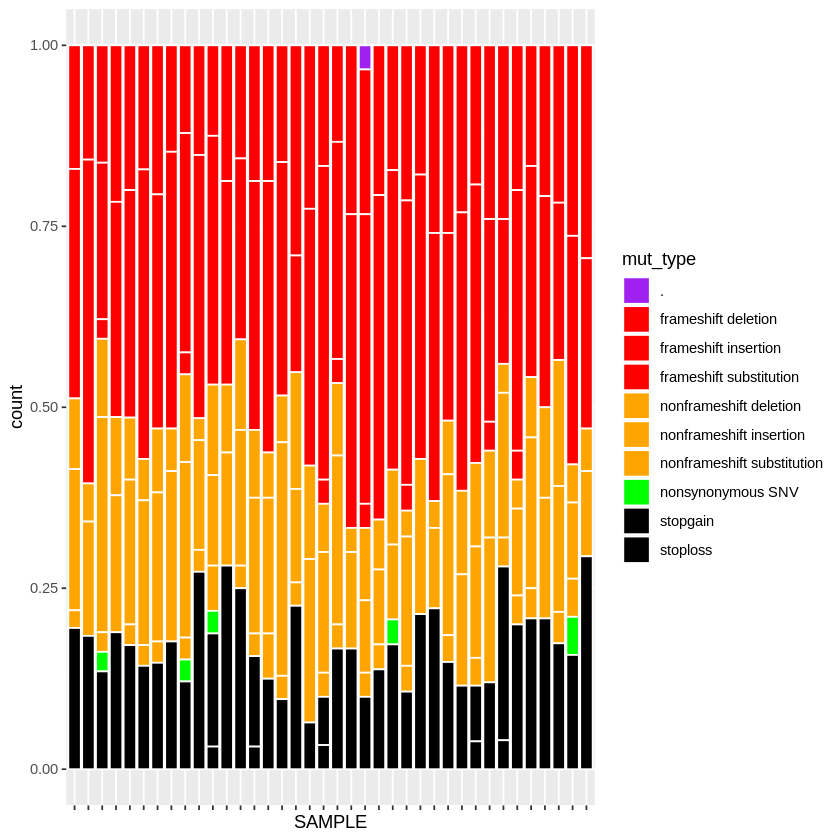

In [38]:
ggplot(dataLOF,aes(SAMPLE,fill=mut_type))+
  geom_bar(color="white",position="fill")+
  theme(axis.text.x = element_blank())+
  scale_fill_manual(values=c("purple",rep("red",3),rep("orange",3),"green","black","black"))